In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import squarify

In [5]:
df=pd.read_csv("D:\Data for ML\Online_Retailer.csv",encoding='latin1')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(406829, 8)

In [11]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [12]:
df.drop(df[df['Quantity'] <= 0].index,inplace=True)

In [13]:
df.shape

(397924, 8)

In [14]:
df.drop(df[df['UnitPrice'] <= 0].index,inplace=True)

In [15]:
df.shape

(397884, 8)

In [16]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['CustomerID'] = df['CustomerID'].astype(str)
for i in df['CustomerID']:
    if len(i) !=5:
        print(i)
print("CustomerID is fine")

CustomerID is fine


In [17]:
duplicate = df[df.duplicated('InvoiceNo')] 
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [18]:
df['InvoiceDate']

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 397884, dtype: object

In [19]:
df['YearOfSale'] = pd.DatetimeIndex(df['InvoiceDate']).year
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,2011


In [20]:
numerical_variables = [feature for feature in df.columns if (df[feature].dtypes != 'O' and df[feature].dtypes !='<M8[ns]')]
numerical_variables
df_corr = df[numerical_variables].corr()
df_corr

,Quantity,UnitPrice,YearOfSale
Quantity,1.000000,-0.004563,0.001553
UnitPrice,-0.004563,1.000000,-0.000192
YearOfSale,0.001553,-0.000192,1.000000


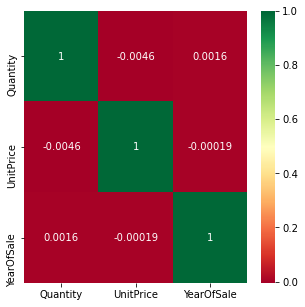

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
heat_map = sns.heatmap(df_corr,annot=True,cmap="RdYlGn",ax=ax)

In [22]:
df['InvoiceDate']

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 397884, dtype: object

In [23]:
df['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 397884, dtype: object

In [24]:
df['Price'] = df['Quantity'] * df['UnitPrice']

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010,20.34


In [26]:
Now = dt.datetime(2011,12,10)

In [27]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [28]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [29]:
rfmTable = df.groupby('CustomerID').agg({'InvoiceDate' : lambda x :(Now - x.max()).days,
                                         'InvoiceNo' : lambda x :len(x),'Price' : lambda x :sum(x) })

In [30]:
rfmTable.rename(columns ={'InvoiceDate' : 'Recency', 'InvoiceNo' :'Frequency',
                          'Price':'Monetary_Value'},inplace = True)

In [31]:
rfmTable.head()

,Recency,Frequency,Monetary_Value
CustomerID,,,
12346,325,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,18,73,1757.55
12350,310,17,334.40


In [32]:
r_labels = range(4,0,-1)
f_labels = range(1,5)
m_labels = range(1,5)

r_groups = pd.qcut(rfmTable['Recency'],4,r_labels)

f_groups = pd.qcut(rfmTable['Frequency'],4,f_labels)

m_groups = pd.qcut(rfmTable['Monetary_Value'],4,m_labels)

rfmTable = rfmTable.assign(R=r_groups,F=f_groups,M=m_groups)

rfmTable.head()

rfmTable.info()

rfmTable.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Recency         4338 non-null   int64   
 1   Frequency       4338 non-null   int64   
 2   Monetary_Value  4338 non-null   float64 
 3   R               4338 non-null   category
 4   F               4338 non-null   category
 5   M               4338 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 148.7+ KB


Recency              int64
Frequency            int64
Monetary_Value     float64
R                 category
F                 category
M                 category
dtype: object

In [33]:
rfmTable['R'] = rfmTable['R'].astype(str)
rfmTable['F'] = rfmTable['F'].astype(str)
rfmTable['M'] = rfmTable['M'].astype(str)

In [34]:
rfmTable['RFM_Segment'] = rfmTable['R'].map(str) + rfmTable['F'].map(str) + rfmTable['M'].map(str)

rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment
CustomerID,,,,,,,
12346,325,1,77183.60,1,1,4,114
12347,2,182,4310.00,4,4,4,444
12348,75,31,1797.24,2,2,4,224
12349,18,73,1757.55,3,3,4,334
12350,310,17,334.40,1,1,2,112


In [35]:
rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment
CustomerID,,,,,,,
12346,325,1,77183.60,1,1,4,114
12347,2,182,4310.00,4,4,4,444
12348,75,31,1797.24,2,2,4,224
12349,18,73,1757.55,3,3,4,334
12350,310,17,334.40,1,1,2,112


In [36]:
#Count Number of Unique Segments

rfm_segment = rfmTable.groupby('RFM_Segment')['RFM_Segment']



print('The Number of Unique Segment is - ',rfm_segment.nunique().sum())
print('***********************************')
print(rfm_segment.unique())
print('***********************************')

The Number of Unique Segment is -  61
***********************************
RFM_Segment
111    [111]
112    [112]
113    [113]
114    [114]
121    [121]
       ...  
434    [434]
441    [441]
442    [442]
443    [443]
444    [444]
Name: RFM_Segment, Length: 61, dtype: object
***********************************


In [37]:
rfmTable['R'] = rfmTable['R'].astype(int)
rfmTable['F'] = rfmTable['F'].astype(int)
rfmTable['M'] = rfmTable['M'].astype(int)

In [38]:
rfmTable['RFM_Score'] = rfmTable[['R','F','M']].sum(axis=1)

In [44]:
rfm_level_agg = rfmTable.groupby('RFM_Level').agg({'Recency' :'mean',
                                       'Frequency':'mean',
                                       'Monetary_Value':['mean','count']}).round(1)
rfm_level_agg

Recency Frequency Monetary_Value      
                      mean      mean           mean count
RFM_Level                                                
Can't Loose Them      25.9     192.0         4406.5  1676
Champions             63.7      57.0          994.1   459
Loyal                 79.3      38.7          760.4   452
Needs Attention      174.2      13.7          239.0   385
Potential             95.6      28.0          823.8   464
Promising            153.3      21.4          368.7   517
Require Activation   260.4       8.2          159.3   385

In [41]:
rfmTable

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,325,1,77183.60,1,1,4,114,6
12347,2,182,4310.00,4,4,4,444,12
12348,75,31,1797.24,2,2,4,224,8
12349,18,73,1757.55,3,3,4,334,10
12350,310,17,334.40,1,1,2,112,4
...,...,...,...,...,...,...,...,...
18280,277,10,180.60,1,1,1,111,3
18281,180,7,80.82,1,1,1,111,3
18282,7,12,178.05,4,1,1,411,6


In [42]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfmTable['RFM_Level'] = rfmTable.apply(rfm_level, axis=1)

rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346,325,1,77183.60,1,1,4,114,6,Potential
12347,2,182,4310.00,4,4,4,444,12,Can't Loose Them
12348,75,31,1797.24,2,2,4,224,8,Champions
12349,18,73,1757.55,3,3,4,334,10,Can't Loose Them
12350,310,17,334.40,1,1,2,112,4,Needs Attention


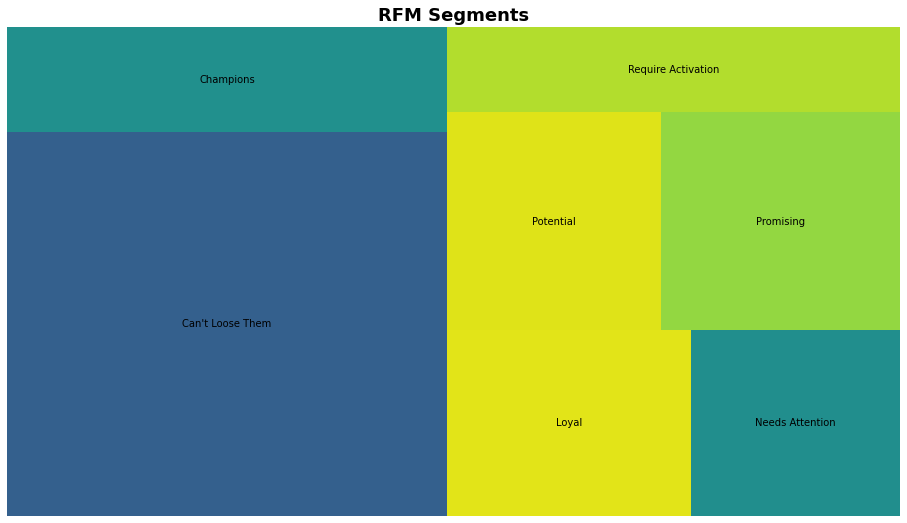

In [45]:
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=["Can't Loose Them",
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=1)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [46]:
rfm_rfm = rfmTable[['Recency','Frequency','Monetary_Value']]
print(rfm_rfm.describe())

           Recency    Frequency  Monetary_Value
count  4338.000000  4338.000000     4338.000000
mean     92.059474    91.720609     2054.266460
std     100.012264   228.785094     8989.230441
min       0.000000     1.000000        3.750000
25%      17.000000    17.000000      307.415000
50%      50.000000    41.000000      674.485000
75%     141.750000   100.000000     1661.740000
max     373.000000  7847.000000   280206.020000


In [47]:
rfm_sqrt = rfmTable[['Recency', 'Frequency', 'Monetary_Value']].apply(np.sqrt, axis = 1).round(3)
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_sqrt)
rfm_normalized.shape

(4338, 3)

In [48]:
from sklearn.cluster import KMeans 
inertia = []
kr = range(1,8)
for k in kr:
    km = KMeans(n_clusters = k,random_state=1)
    km.fit(rfm_normalized)
    inertia.append(km.inertia_)

In [49]:
print (inertia)

[13013.999999999969, 8258.24003956993, 5672.519703051771, 4217.659877913251, 3490.362089654071, 3113.4356366490506, 2789.865653361167]


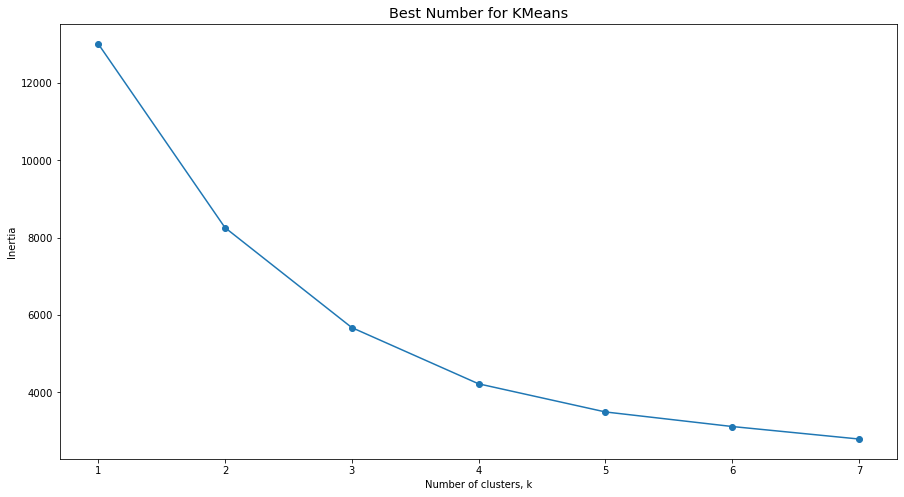

In [50]:
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('Best Number for KMeans')
plt.show()

In [51]:
# clustering
kc = KMeans(n_clusters=3,random_state=1)
kc.fit(rfm_normalized)
KMeans(n_clusters=3, random_state=1)
# Assign the clusters to datamart
rfmTable['K_Cluster'] = kc.labels_
rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
CustomerID,,,,,,,,,,
12346,325,1,77183.60,1,1,4,114,6,Potential,1
12347,2,182,4310.00,4,4,4,444,12,Can't Loose Them,1
12348,75,31,1797.24,2,2,4,224,8,Champions,0
12349,18,73,1757.55,3,3,4,334,10,Can't Loose Them,0
12350,310,17,334.40,1,1,2,112,4,Needs Attention,2


[]

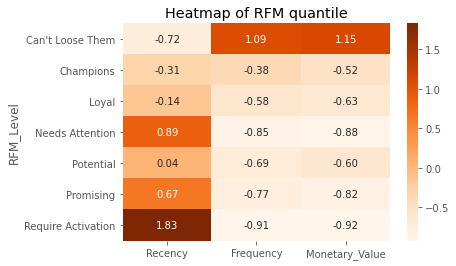

In [52]:
# the mean value in total 
total_avg = rfmTable.iloc[:, 0:3].mean()
total_avg
# calculate the proportional gap with total mean
cluster_avg = rfmTable.groupby('RFM_Level').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
# heatmap with RFM
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True)
plt.title('Heatmap of RFM quantile')
plt.plot()

[]

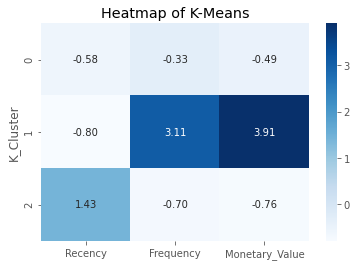

In [53]:
# calculate the proportional gap with total mean
cluster_avg_K = rfmTable.groupby('K_Cluster').mean().iloc[:, 0:3]
prop_rfm_K = cluster_avg_K/total_avg - 1
# heatmap with K-means
sns.heatmap(prop_rfm_K, cmap= 'Blues', fmt= '.2f', annot = True)
plt.title('Heatmap of K-Means')
plt.plot()